Note: Random Forest is a type of ensemble learning(as is gradient boosting etc.)

ensemble learning: taking a multiple algo's and putting thm together or running an algo multiple times and comibining it's results.

Here, we will use an RFR approach to predict the 6.5 level salary. A random forest is essentially a collection of DT that have been averaged together.

Let us assume that our target for the 6.5 level is 160,000.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [31]:
dataset = pd.read_csv("Position_Salaries.csv")

In [32]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [33]:
regressor = RandomForestRegressor(random_state = 0) #default is 10 tree's and criterion is MSE.
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

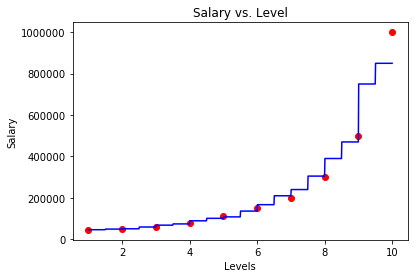

In [44]:
X_grid = np.arange(min(X), max(X)+0.01, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title("Salary vs. Level")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()

As expected, the RF approach leads to more steps in the DT visualisation. Let's see how we did with 10 tree's

In [45]:
y_pred = regressor.predict(6.5)

In [46]:
y_pred

array([ 167000.])

In [47]:
regressor2 = RandomForestRegressor(n_estimators=100, random_state = 0) #default is 10 tree's and criterion is MSE.
regressor2.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

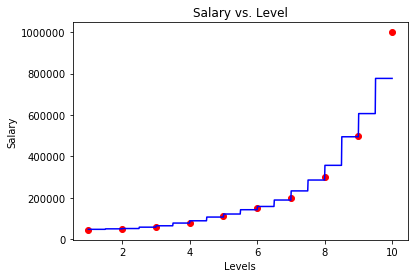

In [48]:
X_grid = np.arange(min(X), max(X)+0.01, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor2.predict(X_grid), color='blue')
plt.title("Salary vs. Level")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()

In [49]:
y_pred2 = regressor2.predict(6.5)

In [50]:
y_pred2

array([ 158300.])

And now lets try with 300 tree's!

In [51]:
regressor3 = RandomForestRegressor(n_estimators=300, random_state = 0) #default is 10 tree's and criterion is MSE.
regressor3.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

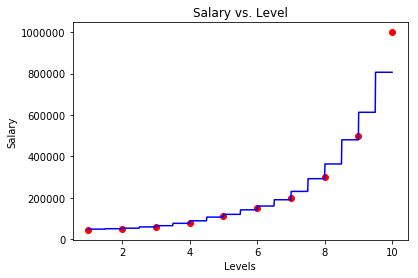

In [52]:
X_grid = np.arange(min(X), max(X)+0.01, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor3.predict(X_grid), color='blue')
plt.title("Salary vs. Level")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()

In [54]:
y_pred3 = regressor3.predict(6.5)

In [55]:
y_pred3

array([ 160333.33333333])

So we can see that the RFR beats our polynomial regression! Yay!